<a href="https://colab.research.google.com/github/raulc27/python_testes/blob/master/DistribuicaoNormal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math

SQRT_TWO_PI = math.sqrt(2 * math.pi)


In [3]:
def normal_pdf(x: float, mu: float = 0, sigma: float=1) -> float:
  return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

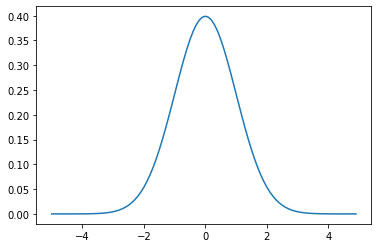

In [4]:
import matplotlib.pyplot as plt
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')

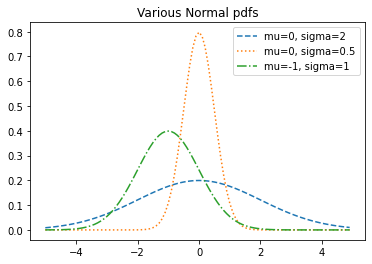

In [5]:
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

In [8]:
def normal_cdf(x: float, mu: float=0, sigma: float=1) -> float:
  return (1 + math.erf((x-mu)/math.sqrt(2)/sigma))/2

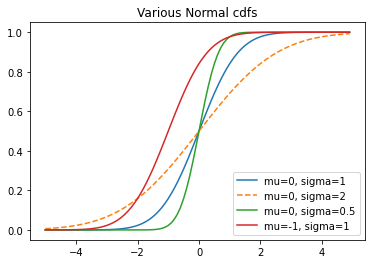

In [9]:
xs = [x/10.0 for x in range(-50,50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], '-', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-', label='mu=-1, sigma=1')
plt.legend(loc=4)
plt.title("Various Normal cdfs")
plt.show()

In [7]:
def inverse_normal_cdf(p: float,
                       mu: float=0,
                       sigma: float=1,
                       tolerance: float=0.00001) -> float:
                       """ encontrar o inverso aproximado usando a pesquisa binária! """

                       # se não for padrão, compute o padrão e redimensione
                       if mu != 0 or sigma != 1:
                         return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

                       low_z = -10.0
                       hi_z = 10.0
                       while hi_z - low_z > tolerance:
                         mid_z = (low_z + hi_z) / 2
                         mid_p = normal_cdf(mid_z)
                         if mid_p < p:
                           low_z = mid_z
                         else:
                           hi_z = mid_z
                       return mid_z


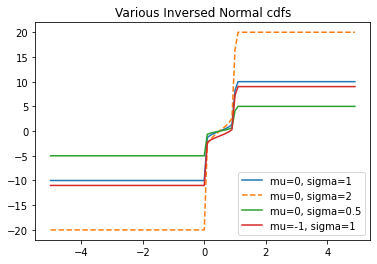

In [11]:
xs = [x/10.0 for x in range(-50,50)]
plt.plot(xs, [inverse_normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [inverse_normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [inverse_normal_cdf(x, sigma=0.5) for x in xs], '-', label='mu=0, sigma=0.5')
plt.plot(xs, [inverse_normal_cdf(x, mu=-1) for x in xs], '-', label='mu=-1, sigma=1')
plt.legend(loc=4)
plt.title("Various Inversed Normal cdfs")
plt.show()